# HW1  Try out gradient descent

## Due Thursday Feb 3rd, 2022 at 11:59PM

You should submit this jupyter notebook with your solutions. The solutions should include the code and also the output of all the cells.

Note that for the problmes that require a cost function as input you should always use the most recent cost function that you have implemented (unless specified otherwise).

1) [5 points] Calculate the derivative of following cost function and write it down:

$g(w) = \frac{1}{50}\left(w^4 + w^2 + 10w - 50 \right)$

$\frac{\partial}{\partial w}g(w) = \frac{1}{50}(4w^3+2w+10)$

2) [25 points] Implement the gradient descent function as discussed in class using the gradient derived in the last problem. The function should return the cost history for each step. Use the code template below:


In [2]:
#gradient descent function
#inputs: alpha (learning rate parameter), max_its (maximum number of iterations), w0 (initialization)
def gradient_descent(alpha,max_its,w0):
    # empty list for cost history
    cost_history = []
    # initial weight
    w = w0
    # loop over iterations
    for k in range(1,max_its+1):
        # calculate cost
        cost = 1/50*((w**4) + w**2 + 10*w - 50)
        # add to cost history
        cost_history.append(cost)
        # update weight according to gradient and learning rate
        cost_gradient = 1/50*(4*(w**3) + 2*w + 10)
        w -= alpha*cost_gradient
    # return cost history
    return cost_history

3) [10 points] Run the gradient_descent function you implemented three times, with the following parameters. Generate a single plot showing the cost as a function of step number for all three runs (combine all three runs into a single plot). If you are not familiar with plotting in python, here is the docs for matplotlib:(https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot). 


$w^0$ = 2.0
max_its = 1000

# first run
alpha = 1
# second run
alpha = 0.1
# third run
alpha = 0.01


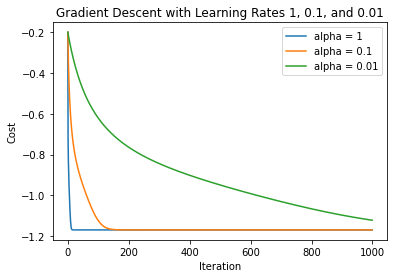

In [3]:
import matplotlib.pyplot as plt
# To keep your plots embedded
%matplotlib inline 

# define starting position and number of iterations
w0 = 2.0
max_its = 1000

# perform the three runs
alpha = 1
cost_history_1 = gradient_descent(alpha,max_its,w0)
alpha = 0.1
cost_history_2 = gradient_descent(alpha,max_its,w0)
alpha = 0.01
cost_history_3 = gradient_descent(alpha,max_its,w0)

# plot results
plt.title('Gradient Descent with Learning Rates 1, 0.1, and 0.01')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.plot(range(max_its), cost_history_1, label='alpha = 1')
plt.plot(range(max_its), cost_history_2, label='alpha = 0.1')
plt.plot(range(max_its), cost_history_3, label='alpha = 0.01')
plt.legend()
plt.show()

For the next few problems we will be comparing fixed and diminishing learning rates

Take the following cost function:
\begin{equation}
g(w) = \left \vert w \right \vert
\end{equation}

4) [5 points] Is this function convex? If no, why not? If yes, where is its global minimum?

Like the least squares cost function, this function is convex. Its global minumum occurs at the point where it is not differentiable.

5) [5 points] What is the derivative of the cost function? 

$g'(w)=\frac{w}{|w|} \\$
$g(w)$ is not differentiable at $w=0$

6) [20 points] Rewrite the gradient descent function from question 2 such that it takes the cost funciton g as input and uses the autograd library to calculate the gradient. The function should return the weight and cost history for each step. Use the code template below.

autograd is a python package for automatic calculation of the gradient. Here is a tutorial on it: (http://www.cs.toronto.edu/~rgrosse/courses/csc321_2017/tutorials/tut4.pdf

Note that in Python you can pass functions around like any other variables. That is why you can pass the cost function g to the gradient_descent function. 

You should be able to install it by running "pip install autograd" in a cell in your Jupyter notebook.

In [4]:
from autograd import grad 

#gradient descent function
#inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w0):
    # find gradient of function
    gradient = grad(g)  
    # empty lists for cost history and weight history
    cost_history = []
    weight_history = []
    # initial weight
    w = w0
    # loop over iterations
    for k in range(1,max_its+1):
        # calculate cost
        cost = g(w)
        # add to cost history
        cost_history.append(cost)
        # add weight to wexight history
        weight_history.append(w)
        # update weight according to cost and learning rate
        w -= alpha*gradient(w)
    # return cost history
    return weight_history,cost_history

7) [10 points] Make a run of max_its=20 steps of gradient descent with initialization at the point $w^0 = 1.75$, and a fixed learning rate of $\alpha = 0.5$. Using the cost and weight history, plot the cost as a function of the weight for each step (cost on y-axis, weight on x-axis). Recall that the terms weight and parameter used interchangeably and both refer to w.

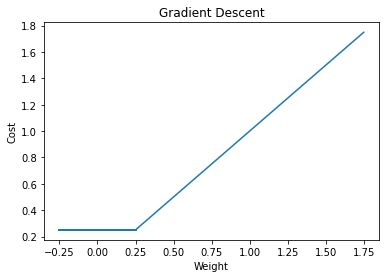

In [5]:
# define starting position, number of iterations, and learning rate
w0 = 1.75
max_its = 20
alpha = 0.5

# define cost function
def g(w):
    y = abs(w)
    return y

# plot results
weight_history, cost_history = gradient_descent(g,alpha,max_its,w0)
plt.title('Gradient Descent')
plt.xlabel('Weight')
plt.ylabel('Cost')
plt.plot(weight_history, cost_history)
plt.show()

8) [15 points] Make a run of max_its=20 steps of gradient descent with initialization at the point $w^0 = 1.75$, using the diminishing rule $\alpha = \frac{1}{k}$ (for this you have to modify the gradient_descent function slightly. Use the code template below. Using the cost and wiehgt history, plot the cost as a function of the weight for each step (cost on y-axis, weight on x-axis)

In [6]:
from autograd import grad 

#gradient descent function
#inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w0):
    # find gradient of function
    gradient = grad(g)  
    # empty lists for cost history and weight history
    cost_history = []
    weight_history = []
    # initial weight
    w = w0
    
    if alpha=='diminishing':
        for k in range(1,max_its+1):
            # update alpha according to diminishing rule
            alpha = 1/k
            # calculate cost
            cost = g(w)
            # add to cost history
            cost_history.append(cost)
            # add weight to weight history
            weight_history.append(w)
            # update weight according to cost and learning rate
            w -= alpha*gradient(w)
    else:
        for k in range(1, max_its+1):
            # calculate cost
            cost = g(w)
            # add to cost history
            cost_history.append(cost)
            # add weight to weight history
            weight_history.append(w)
            # update weight according to cost and learning rate
            w -= alpha*gradient(w)
        pass
    return weight_history,cost_history

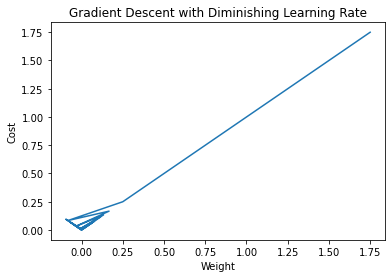

In [7]:
# define starting positio and number of iterations
w0 = 1.75
max_its = 20

# compute cost and weight_history for diminishing learning rate
weight_history_1, cost_history_1 = gradient_descent(g,'diminishing',max_its,w0)

#plot results
plt.title('Gradient Descent with Diminishing Learning Rate')
plt.xlabel('Weight')
plt.ylabel('Cost')
plt.plot(weight_history_1, cost_history_1)
plt.show()


9) [10 points]  Generate a single plot showing the cost as a function of step number for both runs (combine all  runs into a single plot). Which approach works better? Why ?

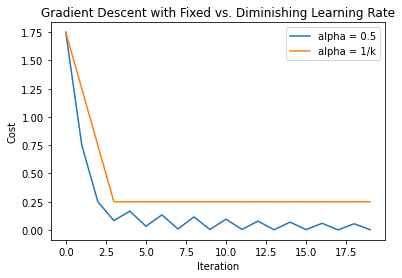

In [8]:
# compute cost and weight_history for fixed learning rate
weight_history_2, cost_history_2 = gradient_descent(g,0.5,max_its,w0)

# plot results 
plt.title('Gradient Descent with Fixed vs. Diminishing Learning Rate')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.plot(range(max_its), cost_history_1, label='alpha = 0.5')
plt.plot(range(max_its), cost_history_2, label='alpha = 1/k')
plt.legend()
plt.show()

Here, the diminishing learning rate 1/k outperforms the fixed learning rate of 0.5. Initially, the diminishing learning rate is able to take a larger leap towards the minumum. Then, when the fixed learning rate converges to a cost of around 0.25, the diminishing learning rate is able to take more precise steps, converging at a lower cost.

We will now look at the oscilating behavior of gradient descent. 

Take the following cost function:
$g(w) = w_0^2 + w_1^2 + 2\sin(1.5 (w_0 + w_1)) +2$

Note that this cost function has two parameters.

10) [5 points] Make sure your gradient descent function from problem 6 can handle cost functions with more than one parameter. You may need to rewrite it if you were not careful. Use the code template below (if your function from problem 6 is good, you can just copy and paste it here)

In [9]:
from autograd import grad 

#gradient descent function
#inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w0):
    # find gradient of function
    gradient = grad(g)
    # empty lists for cost history and weight history
    cost_history = []
    weight_history = []
    # initial weight
    w = w0.copy()
    # loop over iterations
    for k in range(1,max_its+1):
        # calculate cost
        cost = g(w)
        # add to cost history
        cost_history.append(cost)
        # add weight to weight history
        weight_history.append(w)
        # update weight according to cost and learning rate
        w -= alpha*gradient(w)
    # return cost history
    return weight_history, cost_history

11) [10 points] Run the gradient_descent function with the cost function above three times with the following parameters. Generate a single plot showing the cost as a function of step number for all three runs (combine all three runs into a single plot). Use the code template below. Which alpha leads to an oscillating behavior?

$w^0$ = [3.0,3.0]
max_its = 10

# first run
alpha = 0.01
# second run
alpha = 0.1
# third run
alpha = 1



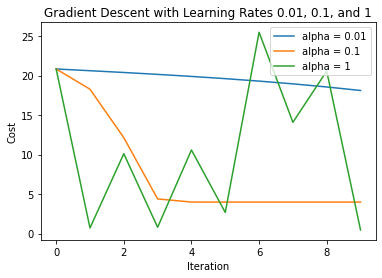

In [10]:
import autograd.numpy as np

import matplotlib.pyplot as plt
# To keep your plots embedded
%matplotlib inline

# define cost function
def g(w):
    y = w[0]**2 + w[1]**2 + 2*(np.sin(1.5*(w[0]+w[1]))) + 2
    return y

# define starting position and number of iterations
w0 = np.array([3.0,3.0])
max_its = 10

# perform the three runs
alpha = 0.01
weight_history_1, cost_history_1 = gradient_descent(g,alpha,max_its,w0)
alpha = 0.1
weight_history_2, cost_history_2 = gradient_descent(g,alpha,max_its,w0)
alpha = 1
weight_history_3, cost_history_3 = gradient_descent(g,alpha,max_its,w0)

# plot results
plt.title('Gradient Descent with Learning Rates 0.01, 0.1, and 1')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.plot(range(max_its), cost_history_1, label='alpha = 0.01')
plt.plot(range(max_its), cost_history_2, label='alpha = 0.1')
plt.plot(range(max_its), cost_history_3, label='alpha = 1')
plt.legend()
plt.show()

A learning rate of 1 is too high, leading to an oscillating behavior.

12) [15 points] This problem is about learning to tune fixed step length for gradient descent. Here, you are given a cost function:
$g(w) = 2w_0^2 + w_1^2 +4w_2^2$ 

Assume your $w^0$= [5,5,5] and your max_iter = 100

Use your latest gradient descent function with a fixed learning rate. Play around with at least 5 different values of alpha (using your intuition). Generate a single plot of the cost as a function of the number of iterations. Which value of alpha seems to converge the fastest?

Not that your grade will not depend on how well you do, as long as you try at least 5 different values for alpha and plot them.

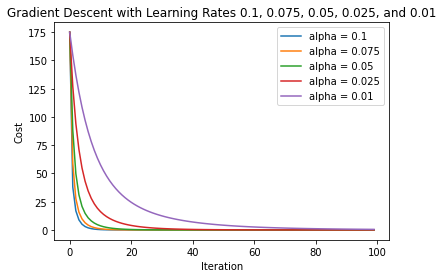

In [11]:
# define cost function
def g(w):
    y = 2*w[0]**2 + w[1]**2 + 4*w[2]**2
    return y

# define starting position and number of iterations
w0 = np.array([5.0,5.0,5.0])
max_its = 100

# perform the three runs
alpha = 0.1
weight_history_1, cost_history_1 = gradient_descent(g,alpha,max_its,w0)
alpha = 0.075
weight_history_2, cost_history_2 = gradient_descent(g,alpha,max_its,w0)
alpha = 0.05
weight_history_3, cost_history_3 = gradient_descent(g,alpha,max_its,w0)
alpha = 0.025
weight_history_4, cost_history_4 = gradient_descent(g,alpha,max_its,w0)
alpha = 0.01
weight_history_5, cost_history_5 = gradient_descent(g,alpha,max_its,w0)

# plot results
plt.title('Gradient Descent with Learning Rates 0.1, 0.075, 0.05, 0.025, and 0.01')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.plot(range(max_its), cost_history_1, label='alpha = 0.1')
plt.plot(range(max_its), cost_history_2, label='alpha = 0.075')
plt.plot(range(max_its), cost_history_3, label='alpha = 0.05')
plt.plot(range(max_its), cost_history_4, label='alpha = 0.025')
plt.plot(range(max_its), cost_history_5, label='alpha = 0.01')
plt.legend()
plt.show()

A learning rate of about 0.1 seems to converge the fastest among these.